### Goals of this EDA notebook are as follows:
1 - Understand the problem\
2 - Univariate Analysis\
3 - Multivariate Analysis\
4 - Basic Cleaning\
5 - Test assumptions

In [1]:
#Import Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [2]:
#load data
df_train = pd.read_csv("train.csv")

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#excel spreadsheet with variables

In [7]:
#Shortlisting a few variables of interest
#Overall Qual, YearBuilt, TotalBsmtSF, GrLivArea
#SalePrice is the dependent variable and the one we are trying to 
#understand

### Univariate Analysis

In [9]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Prashanth\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

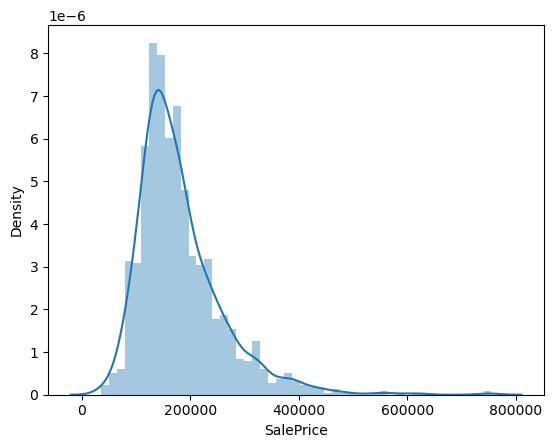

In [10]:
sns.distplot(df_train['SalePrice'])

In [12]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Relationship between SalePrice & Other Numerical Variables

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

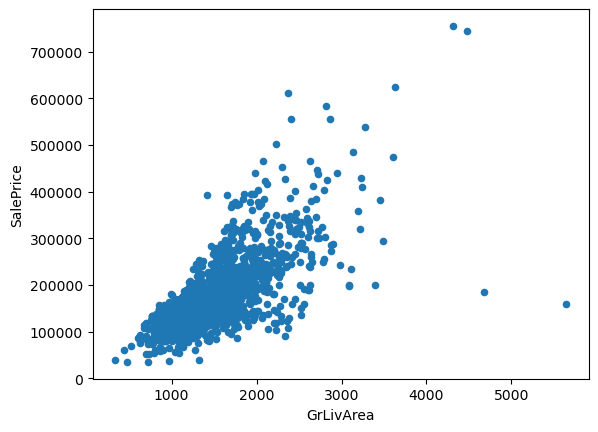

In [17]:
#Scatter plot of Sale Price vs. GrLivArea
df_train.plot.scatter(x = 'GrLivArea',
                 y = 'SalePrice')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

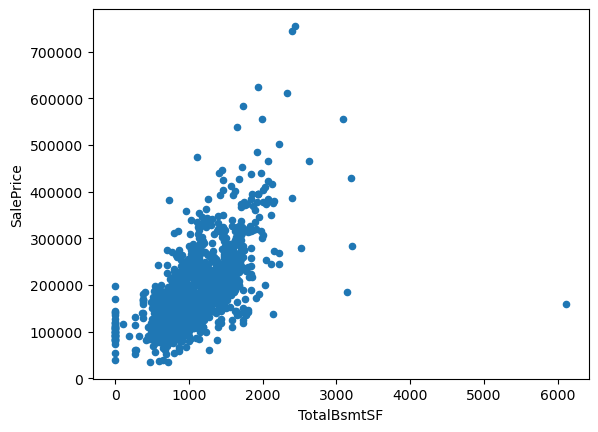

In [18]:
#Scatter plot of Sale Price vs. TotalBsmtSF
df_train.plot.scatter(x = 'TotalBsmtSF',
                 y = 'SalePrice')

### Relationship between SalePrice & Categorical Variables

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

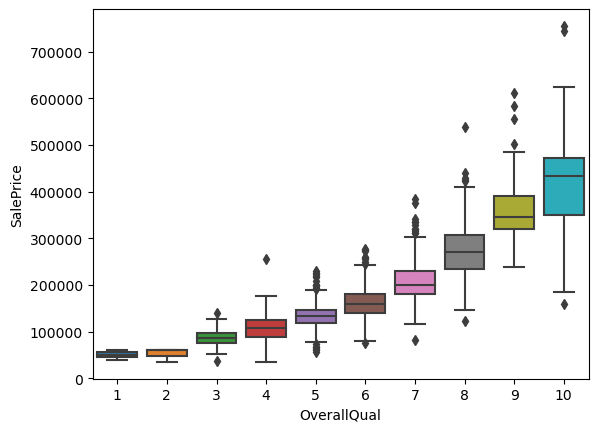

In [20]:
sns.boxplot(x = df_train['OverallQual'],
           y = df_train['SalePrice'])

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

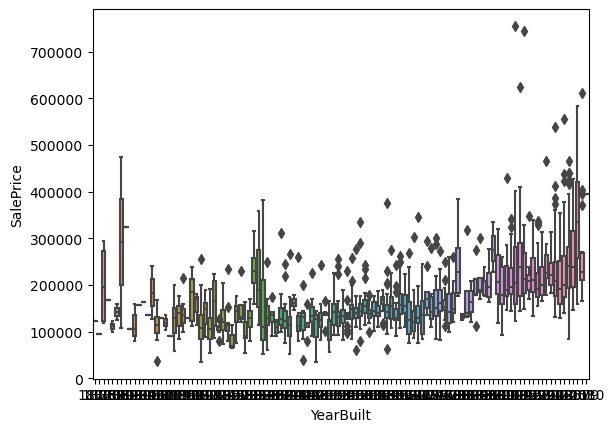

In [21]:
sns.boxplot(x = df_train['YearBuilt'],
           y = df_train['SalePrice'])

### Biv

<AxesSubplot:>

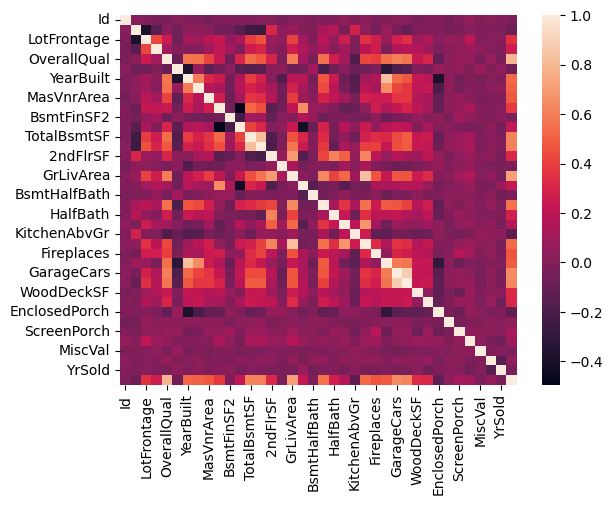

In [26]:
corrmat = df_train.corr()
sns.heatmap(corrmat)